# Stock Market Prediction using Numerical and Textual Analysis

● Objective: Create a hybrid model for stock price/performance prediction using numerical analysis<br>of historical stock prices, and sentimental analysis of
news headlines.

In [1]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='
#we will be analyzing Amazon.com Inc

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jinen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Textual Analysis

I am using FinViz website to get the news headlines for sentimental analysis of news headlines.
<br>Here we will be analyzing Amazon.com Inc's stock.<br><br>We will be using VADER for sentimental analysis.

In [2]:
news_tables = {}
tickers = ['AMZN']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

The code below shows stores the entire ‘news-table’ from the FinViz website into a Python dictionary, news_tables, for Amazon (AMZN). You can do this for any stock like Tesla (TSLA) and Google(GOOG) (or rather Alphabet, the company that owns Google). You can include as many tickers as you want in the tickers list above.

In [3]:
# Read one single day of headlines for 'AMZN' 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

Etsy Stock Is Up Almost 300% in 2020: Here's Why It's Still Worth Buying
Dec-15-20 06:20AM  
Walmart Is Expanding Its Self-Driving Technology. Why Thats Good for the Stock.
06:01AM  
These 3 Stocks Have Leapfrogged Amazon on Robinhood
05:51AM  
FTC orders tech giants to provide details of how they collect data, and what effects they have on children
Dec-14-20 09:29PM  


In [4]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AMZN',
  'Dec-15-20',
  '06:20AM',
  "Etsy Stock Is Up Almost 300% in 2020: Here's Why It's Still Worth Buying"],
 ['AMZN',
  'Dec-15-20',
  '06:01AM',
  'Walmart Is Expanding Its Self-Driving Technology. Why Thats Good for the Stock.'],
 ['AMZN',
  'Dec-15-20',
  '05:51AM',
  'These 3 Stocks Have Leapfrogged Amazon on Robinhood'],
 ['AMZN',
  'Dec-14-20',
  '09:29PM',
  'FTC orders tech giants to provide details of how they collect data, and what effects they have on children'],
 ['AMZN',
  'Dec-14-20',
  '06:30PM',
  'Amazon, Facebook Among Targets in FTC Data Practices Review'],
 ['AMZN',
  'Dec-14-20',
  '05:38PM',
  'Europes new antitrust rules will annoy, not topple, Big Tech'],
 ['AMZN',
  'Dec-14-20',
  '05:28PM',
  'The Dow Fell 185 Points Points Because the Risks Are Looking Bigger'],
 ['AMZN',
  'Dec-14-20',
  '04:37PM',
  'California subpoenas Amazon over worker safety amid pandemic'],
 ['AMZN',
  'Dec-14-20',
  '04:05PM',
  "Amazon CEO Jeff Bezos cashing in on pandemic 

In [5]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2020-12-15,06:20AM,Etsy Stock Is Up Almost 300% in 2020: Here's W...,0.0,0.872,0.128,0.2263
1,AMZN,2020-12-15,06:01AM,Walmart Is Expanding Its Self-Driving Technolo...,0.0,0.791,0.209,0.4404
2,AMZN,2020-12-15,05:51AM,These 3 Stocks Have Leapfrogged Amazon on Robi...,0.0,0.779,0.221,0.1779
3,AMZN,2020-12-14,09:29PM,FTC orders tech giants to provide details of h...,0.0,1.000,0.000,0.0000
4,AMZN,2020-12-14,06:30PM,"Amazon, Facebook Among Targets in FTC Data Pra...",0.0,0.825,0.175,0.1779
...,...,...,...,...,...,...,...,...
95,AMZN,2020-12-10,08:31AM,4 E-commerce Stocks Set to Gain From Rising Co...,0.0,0.702,0.298,0.5267
96,AMZN,2020-12-10,08:30AM,"Where to Invest $10,000 Right Now",0.0,1.000,0.000,0.0000
97,AMZN,2020-12-10,08:28AM,Why Is Everyone Talking About Chewy Stock?,0.0,1.000,0.000,0.0000
98,AMZN,2020-12-10,08:24AM,"If You Had Put $5,000 Into Amazon Stock Last J...",0.0,0.898,0.102,0.1779


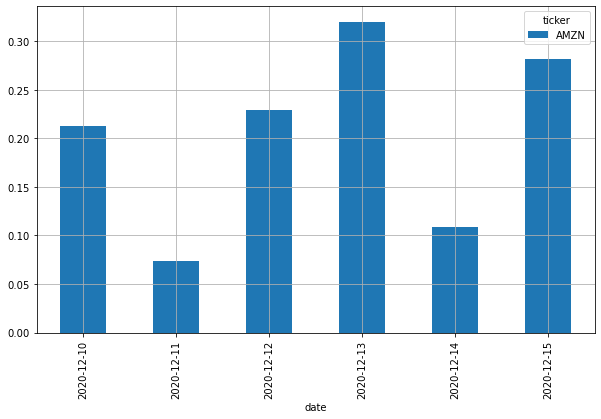

In [6]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

### Historic Stock Data Analysis

Stocks' historic data is downloaded from https://finance.yahoo.com/ <br> You can use any website.

In [7]:
df_prices = pd.read_csv('AMZN.csv')
print(df_prices.head())
print(df_prices.size)

         Date         Open         High          Low        Close  \
0  2019-12-16  1767.000000  1769.500000  1757.050049  1769.209961   
1  2019-12-17  1778.010010  1792.000000  1777.390015  1790.660034   
2  2019-12-18  1795.020020  1798.199951  1782.359985  1784.030029   
3  2019-12-19  1780.500000  1792.989990  1774.060059  1792.280029   
4  2019-12-20  1799.619995  1802.969971  1782.449951  1786.500000   

     Adj Close   Volume  
0  1769.209961  3145200  
1  1790.660034  3644400  
2  1784.030029  3351400  
3  1792.280029  2652800  
4  1786.500000  5150800  
1764


In [8]:
#Converting Date column to datetime datatype
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [9]:
df_prices.dropna(inplace = True)

Text(0, 0.5, 'Close')

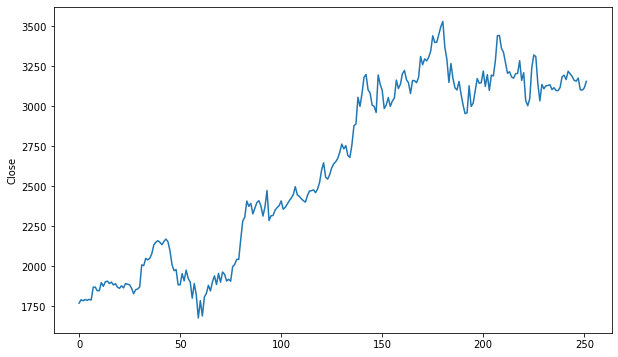

In [10]:
plt.figure(figsize=(10, 6))
df_prices['Close'].plot()
plt.ylabel('Close')

Text(0.5, 1.0, 'Returns')

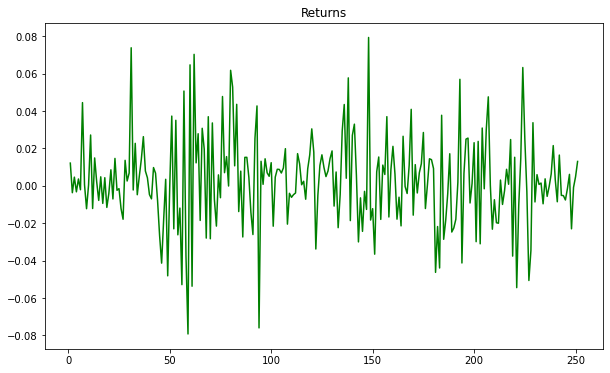

In [11]:
#Plotting returns
close = df_prices['Close']
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

In [12]:
parsed_and_scored_news

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2020-12-15,06:20AM,Etsy Stock Is Up Almost 300% in 2020: Here's W...,0.0,0.872,0.128,0.2263
1,AMZN,2020-12-15,06:01AM,Walmart Is Expanding Its Self-Driving Technolo...,0.0,0.791,0.209,0.4404
2,AMZN,2020-12-15,05:51AM,These 3 Stocks Have Leapfrogged Amazon on Robi...,0.0,0.779,0.221,0.1779
3,AMZN,2020-12-14,09:29PM,FTC orders tech giants to provide details of h...,0.0,1.000,0.000,0.0000
4,AMZN,2020-12-14,06:30PM,"Amazon, Facebook Among Targets in FTC Data Pra...",0.0,0.825,0.175,0.1779
...,...,...,...,...,...,...,...,...
95,AMZN,2020-12-10,08:31AM,4 E-commerce Stocks Set to Gain From Rising Co...,0.0,0.702,0.298,0.5267
96,AMZN,2020-12-10,08:30AM,"Where to Invest $10,000 Right Now",0.0,1.000,0.000,0.0000
97,AMZN,2020-12-10,08:28AM,Why Is Everyone Talking About Chewy Stock?,0.0,1.000,0.000,0.0000
98,AMZN,2020-12-10,08:24AM,"If You Had Put $5,000 Into Amazon Stock Last J...",0.0,0.898,0.102,0.1779


In [13]:
df_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-16,1767.000000,1769.500000,1757.050049,1769.209961,1769.209961,3145200
1,2019-12-17,1778.010010,1792.000000,1777.390015,1790.660034,1790.660034,3644400
2,2019-12-18,1795.020020,1798.199951,1782.359985,1784.030029,1784.030029,3351400
3,2019-12-19,1780.500000,1792.989990,1774.060059,1792.280029,1792.280029,2652800
4,2019-12-20,1799.619995,1802.969971,1782.449951,1786.500000,1786.500000,5150800
...,...,...,...,...,...,...,...
247,2020-12-08,3158.899902,3184.129883,3120.020020,3177.290039,3177.290039,3286300
248,2020-12-09,3167.889893,3174.429932,3088.000000,3104.199951,3104.199951,4100800
249,2020-12-10,3088.989990,3142.100098,3076.000000,3101.489990,3101.489990,3030200
250,2020-12-11,3096.659912,3118.669922,3072.820068,3116.419922,3116.419922,3064700


In [14]:
df_news = parsed_and_scored_news.rename(columns={'date': 'Date'})

In [15]:
df_news

,ticker,Date,time,headline,neg,neu,pos,compound
0,AMZN,2020-12-15,06:20AM,Etsy Stock Is Up Almost 300% in 2020: Here's W...,0.0,0.872,0.128,0.2263
1,AMZN,2020-12-15,06:01AM,Walmart Is Expanding Its Self-Driving Technolo...,0.0,0.791,0.209,0.4404
2,AMZN,2020-12-15,05:51AM,These 3 Stocks Have Leapfrogged Amazon on Robi...,0.0,0.779,0.221,0.1779
3,AMZN,2020-12-14,09:29PM,FTC orders tech giants to provide details of h...,0.0,1.000,0.000,0.0000
4,AMZN,2020-12-14,06:30PM,"Amazon, Facebook Among Targets in FTC Data Pra...",0.0,0.825,0.175,0.1779
...,...,...,...,...,...,...,...,...
95,AMZN,2020-12-10,08:31AM,4 E-commerce Stocks Set to Gain From Rising Co...,0.0,0.702,0.298,0.5267
96,AMZN,2020-12-10,08:30AM,"Where to Invest $10,000 Right Now",0.0,1.000,0.000,0.0000
97,AMZN,2020-12-10,08:28AM,Why Is Everyone Talking About Chewy Stock?,0.0,1.000,0.000,0.0000
98,AMZN,2020-12-10,08:24AM,"If You Had Put $5,000 Into Amazon Stock Last J...",0.0,0.898,0.102,0.1779


In [16]:
df_news['Date'] = pd.to_datetime(df_news['Date'], utc=True)
df_prices['Date'] = pd.to_datetime(df_prices['Date'], utc=True)

In [17]:
df_merge = pd.merge(df_prices, df_news, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,time,headline,neg,neu,pos,compound
0,2020-12-10 00:00:00+00:00,3088.98999,3142.100098,3076.0,3101.489990,3101.489990,3030200,AMZN,11:59PM,How Compassionate AI Is Making LivePerson a Wi...,0.000,0.417,0.583,0.7906
1,2020-12-10 00:00:00+00:00,3088.98999,3142.100098,3076.0,3101.489990,3101.489990,3030200,AMZN,11:58PM,Will Amazon.com's (NASDAQ:AMZN) Growth In ROCE...,0.000,0.698,0.302,0.3818
2,2020-12-10 00:00:00+00:00,3088.98999,3142.100098,3076.0,3101.489990,3101.489990,3030200,AMZN,07:07PM,Oracle Projects Growing Revenue After Years of...,0.000,0.825,0.175,0.1779
3,2020-12-10 00:00:00+00:00,3088.98999,3142.100098,3076.0,3101.489990,3101.489990,3030200,AMZN,05:56PM,Amazon Says It Is Now the No. 1 Corporate Purc...,0.147,0.600,0.253,0.1531
4,2020-12-10 00:00:00+00:00,3088.98999,3142.100098,3076.0,3101.489990,3101.489990,3030200,AMZN,04:39PM,Broadcom Warns of Soft Enterprise Demand; Shar...,0.287,0.495,0.218,0.0772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2020-12-14 00:00:00+00:00,3143.00000,3190.469971,3126.0,3156.969971,3156.969971,4142900,AMZN,07:53AM,Better Buy: Amazon vs. Kroger,0.000,0.395,0.605,0.5574
77,2020-12-14 00:00:00+00:00,3143.00000,3190.469971,3126.0,3156.969971,3156.969971,4142900,AMZN,06:06AM,"5 Unstoppable Trends to Invest $1,000 In for 2021",0.205,0.795,0.000,-0.2023
78,2020-12-14 00:00:00+00:00,3143.00000,3190.469971,3126.0,3156.969971,3156.969971,4142900,AMZN,03:26AM,"China Fines Alibaba, Tencent Unit Under Anti-M...",0.000,1.000,0.000,0.0000
79,2020-12-14 00:00:00+00:00,3143.00000,3190.469971,3126.0,3156.969971,3156.969971,4142900,AMZN,03:01AM,Star Alliance Goes All-In on AWS to Invent the...,0.000,1.000,0.000,0.0000


In [18]:
df = df_merge[['Close','compound', 'neg', 'neu' ,'pos']]
df

,Close,compound,neg,neu,pos
0,3101.489990,0.7906,0.000,0.417,0.583
1,3101.489990,0.3818,0.000,0.698,0.302
2,3101.489990,0.1779,0.000,0.825,0.175
3,3101.489990,0.1531,0.147,0.600,0.253
4,3101.489990,0.0772,0.287,0.495,0.218
...,...,...,...,...,...
76,3156.969971,0.5574,0.000,0.395,0.605
77,3156.969971,-0.2023,0.205,0.795,0.000
78,3156.969971,0.0000,0.000,1.000,0.000
79,3156.969971,0.0000,0.000,1.000,0.000


In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,compound,neg,neu,pos
0,0.0,1.000000,0.000000,0.036364,0.963636
1,0.0,0.682756,0.000000,0.500826,0.499174
2,0.0,0.524523,0.000000,0.710744,0.289256
3,0.0,0.505277,0.345882,0.338843,0.418182
4,0.0,0.446376,0.675294,0.165289,0.360331


In [20]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [21]:
X.head()

,compound,neg,neu,pos
0,1.000000,0.000000,0.036364,0.963636
1,0.682756,0.000000,0.500826,0.499174
2,0.524523,0.000000,0.710744,0.289256
3,0.505277,0.345882,0.338843,0.418182
4,0.446376,0.675294,0.165289,0.360331


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(64, 4)

In [23]:
x_train[:10]

,compound,neg,neu,pos
66,0.386466,0.000000,1.000000,0.000000
41,0.386466,0.000000,1.000000,0.000000
3,0.505277,0.345882,0.338843,0.418182
69,0.687180,0.000000,0.495868,0.504132
7,0.764939,0.000000,0.631405,0.368595
76,0.819028,0.000000,0.000000,1.000000
80,0.782710,0.000000,0.563636,0.436364
40,0.386466,0.000000,1.000000,0.000000
43,0.795204,0.000000,0.226446,0.773554
4,0.446376,0.675294,0.165289,0.360331


### Model Training and Accurcy

In [24]:
import lightgbm
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)

LGBMRegressor()

In [25]:
from sklearn.metrics import mean_squared_error
predictions = lgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.21117537642361603
